<a href="https://colab.research.google.com/github/abhivardhanreddy24/Task-2-Data-Cleaning/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
Missing values in each column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house

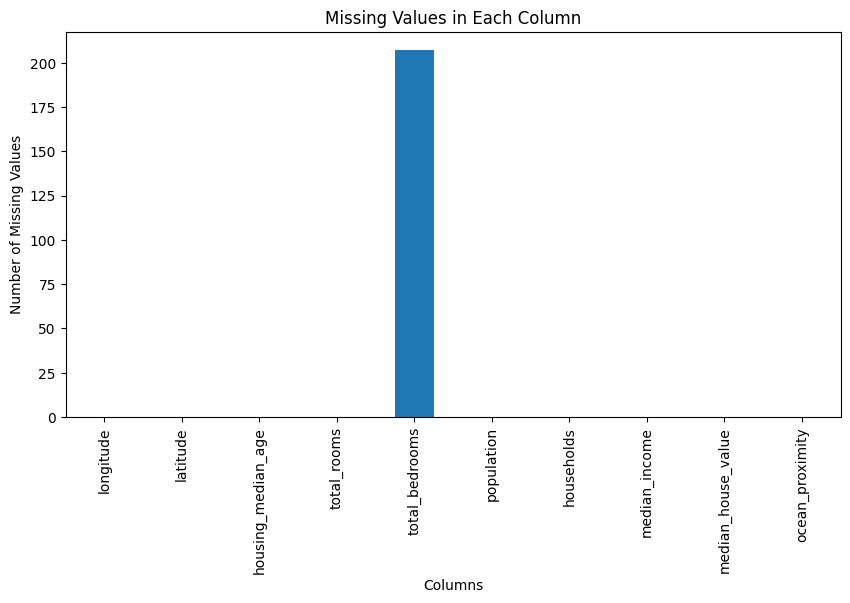

Numerical Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
Categorical Columns: ['ocean_proximity']
Missing values after cleaning:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
Final dataset shape:
(20640, 10)
Cleaned dataset saved successfully!


/tmp/ipython-input-1949207994.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"

df = pd.read_csv(url)

# Display first 5 rows
df.head()
# Shape of dataset (rows, columns)
df.shape
# Column names & data types
df.info()
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)
missing_values.plot(kind='bar', figsize=(10, 5))
plt.title("Missing Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.show()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:", list(num_cols))
print("Categorical Columns:", list(cat_cols))
for col in num_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=threshold)
print("Missing values after cleaning:")
print(df.isnull().sum())
print("Final dataset shape:")
print(df.shape)
df.to_csv("cleaned_dataset.csv", index=False)
print("Cleaned dataset saved successfully!")
